# Linear Algebra Review - Numpy

## Introduction
Images are represented in python as matrices
The meaning of the numbers recorded in those matrices varies depending on the coordinate system employed, but the matrix is the operational form of the image

Fortunately, matrix manipulation underlies much of scientific computing, so many libraries in different languages have been developed to facilitate effecient matrix computation
`Numpy` is one such package for python: https://numpy.org/
Numpy abstracts away much of the complexities of memory management associated with large scale matrix operations that must be explicitly managed in old-school scientific computing in C or Fortran

`Scipy` builds on the `numpy` foundation by including functions that perform frequently-used matrix operations used in the sciences

While numpy interface makes matrix operations straightforward, the reviewing the linear algebra that underlies much of the image processing we'll be performing is worthwhile

Below I'll be reviewing both the use of numpy and demonstrating basic principles of linear algebra with it. 

## Index
* [Introduction] (#Introduction)
* [Lit and linnks] (#lit-and-links)
* [Using Numpy] (#using-numpy)
* [Vectors and Vector Spaces] (#vectors-and-vector-spaces)


## Using Numpy
Numpy offers an interface for vector and matrix creation and manipulation


### Creating Vectors
creating a vector is simple in numpy  
simply pass the contents of the vector as a tuple or list to the array function

In [1]:
import numpy as np

a = np.array([1,2,3])
a

array([1, 2, 3])

In [2]:
a.shape

(3,)

In [3]:
a.size

3

In [4]:
a.dtype

dtype('int64')

In [5]:
a.data

As the above code shows, a *Vector* can be defined as a list of numers passed to the np.array function. 
The resulting array object has several properties:  
> `shape` - a tuple of the dimensions of the array in (x,y)/(m,n) order  
> `size` - an integer describing the number of elements in the array  
> `dtype` - the underlying encoding of the numbers recorded in the array - relevant if   ranges or rounding errors are a concern  
> `ndim` - the number of dimensions in the array  
> `data` - the actual values recorded in the array object  


The data element of a vector can be accessed with brackets `[i]`.

In [7]:
print("The value of element 0 of a is: "+str(a[0]))
print("The value of element 1 of a is: "+str(a[1]))

The value of element 0 of a is: 1
The value of element 1 of a is: 2


### Plotting Vectors in matplotlib
Visualization can be helpful in understanding what linear operations are doing  
using matplotlib, we can view our vectors and the results of transformations on them  
source: https://stackoverflow.com/questions/13430231/how-i-can-get-cartesian-coordinate-system-in-matplotlib

Remeber that a vector is many things
> a collection of numbers
> a set of distances along a coordinate axis
> a point representing the distances along each orthogonal coordinate aspect specified 
> a line in space connecting the origin to the point in n-dimensional space
> A solution to an infinite number of linear equations


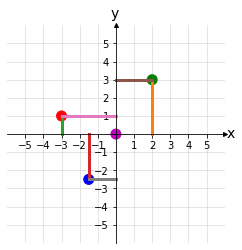

In [8]:
from pylab import *
import matplotlib.pyplot as plt

x = [0,2,-3,-1.5]
y = [0,3,1,-2.5]
color=['m','g','r','b']

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -5, 5, -5, 5
ticks_frequency = 1


fig = plt.figure()
ax = fig.add_subplot(111)

scatter(x,y, s=100 ,marker='o', c=color)

[ plot( [dot_x,dot_x] ,[0,dot_y], '-', linewidth = 3 ) for dot_x,dot_y in zip(x,y) ] 
[ plot( [0,dot_x] ,[dot_y,dot_y], '-', linewidth = 3 ) for dot_x,dot_y in zip(x,y) ]

left,right = ax.get_xlim()
low,high = ax.get_ylim()


# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])


# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect in this example with ticks_frequency=1
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

plt.show()



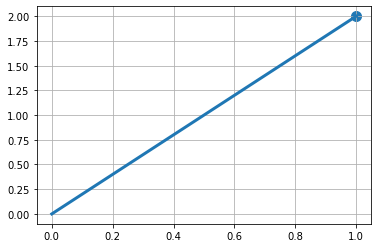

In [9]:
#below, a simplified plot displays a vector r

r=(1,2)

fig = plt.figure()
ax=fig.add_subplot(111)

scatter(r[0],r[1], s=100, marker = "o", label = "r")

plot([r[0],0],[r[1],0], '-', linewidth = 3)
#plot((0,2),(0,2), '-', linewidth = 3)
#plot((2,0),(2,0), '-', linewidth = 3)


left,right = ax.get_xlim()
low,high = ax.get_ylim()
#arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
#arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 ) 

grid()

show()

### Vector plotting function
This example needs to be digested into a more general function I can use to plot vectors


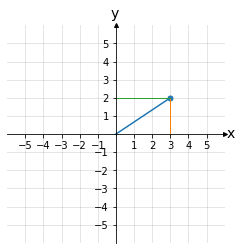

In [10]:
def plotVector(vector, show_Components=True, xmin=-5, ymin=-5, xmax=5,ymax=5, tick_Frequencty = 1): 
    
    # Extract the input vector to pass into the function
    x = vector[0]
    y = vector[1]
    
    # Select length of axes and the space between tick labels
    gridDims = [xmin, xmax, ymin, ymax]
    ticks_frequency = 1


    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # Place the point and the line for the vector
    scatter(x,y, s=25 ,marker='o')
    plot([x,0],[y,0], '-', linewidth=1.5)
    
    if show_Components:
        plot([x,x], [0,y], '-', linewidth=1)
        plot([0,x], [y,y], '-', linewidth=1)

    # Set identical scales for both axes
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Create 'x' and 'y' labels placed at the end of the axes
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

    # Create custom major ticks to determine position of tick labels
    x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])


    # Create minor ticks placed at each integer to enable drawing of minor grid
    # lines: note that this has no effect in this example with ticks_frequency=1
    ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
    ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    # Draw arrows
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

    plt.show()

plotVector((3,2))

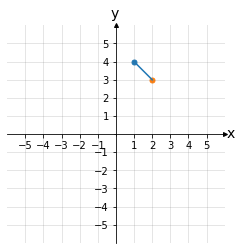

In [11]:
def plotLine(vector1,vector2, xmin=-5, ymin=-5, xmax=5,ymax=5, tick_Frequencty = 1): 
    

    # Select length of axes and the space between tick labels
    gridDims = [xmin, xmax, ymin, ymax]
    ticks_frequency = 1


    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # Place the point and the line for the vector
    scatter(vector1[0], vector1[1], s=25 ,marker='o')
    scatter(vector2[0], vector2[1], s=25 ,marker='o')
    plot((vector1[0],vector2[0]),(vector1[1], vector2[1]), '-', linewidth=1.5)
    
    # Set identical scales for both axes
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Create 'x' and 'y' labels placed at the end of the axes
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

    # Create custom major ticks to determine position of tick labels
    x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])


    # Create minor ticks placed at each integer to enable drawing of minor grid
    # lines: note that this has no effect in this example with ticks_frequency=1
    ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
    ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    # Draw arrows
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

    plt.show()

plotLine((1,4), (2,3))

### Creating Matrices
Like creating a vector, creating a matrix simply consists of passing lists of elements to the array function
In numpy, additional lists of values could be thought of as stacking atop the prior list of elements

recall that matrices are canonically referred to in row(i), column(j) order from the top left of the matrix

In [12]:
b = np.array(([1,2,3], [4,5,6]))
b

array([[1, 2, 3],
       [4, 5, 6]])

In [13]:
b.shape

(2, 3)

In [14]:
b.size

6

In [15]:
b.dtype

dtype('int64')

In [16]:
b.data

As with vectors, *Matrices* can be defined as a list of numers passed to the np.array function. 
The resulting array object has several properties:  
> `shape` - a tuple of the dimensions of the array in (x,y)/(m,n) order  
> `size` - an integer describing the number of elements in the array  
> `dtype` - the underlying encoding of the numbers recorded in the array - relevant if ranges or rounding errors are a concern  
> `ndim` - the number of dimensions in the array  
> `data` - the actual values recorded in the array object  



matrices can also be created by stacking vectors, building a matrix down
the `column_stack` and `hstack` functions allow vectors and matrices to be combined by aligning rows
the opposite functions `row_stack` and `vstack` have predictable functions`

In [17]:
f=np.vstack((a,[1,1,1]))
f

array([[1, 2, 3],
       [1, 1, 1]])

In [18]:
g = np.column_stack(([1,1,1],a))
g

array([[1, 1],
       [1, 2],
       [1, 3]])

### Creating Placeholder Arrays
sometimes to capture the results of an operation it is useful to define a 'blank' matrix of a constant value  
    in numpy the `zeros((dim))`, `ones((dim))`, and `empty((dim),fillVal)` functions can create such 'blank' matrices 

In [19]:
c = np.ones((3,4))
c

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [20]:
c.shape

(3, 4)

In [21]:
c.size

12

In [22]:
c.dtype

dtype('float64')

In [23]:
c.data

The data elements can be accessed with bracket `c[i,j]` indexing, as with vectors

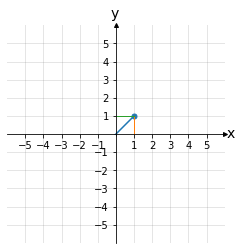

In [24]:
c[1,1]
plotVector(c[1,:])

 note also that ranges along the axes of the array can be selected with the `:` operator
the ranges selected by this method are inclusive of the left parameter and exclusive of the right  
ie `c[0:2,1]` would extract the 2 element column vector containing the elements of c at (0,1) and (1,1) only

In [25]:
c[0:2,1]

array([1., 1.])

The shape of an array can also be changed with `reshape`

In [26]:
d = c.reshape(2,6)
d

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

### Creating multidimensional matrices
Multidimensional matrices a as simple to create as 2-D matrices

In [27]:
e = np.zeros((4,3,3))
e

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [28]:
e.shape

(4, 3, 3)

### Operating on Numpy Vectors and Arrays
operation on numpy vectors and arrays can occur in 2 major ways:  
    *element-wise* - in which scalar operations are applied universally to shift and stretch a vector or array
    *vector-wise* - in which matrix algebra is applied producing projections, rotations, convolutions, etc

## Vectors and vector spaces
Vectors are elements in a vector space  
vector spaces are tautologically the set of all possible elements that they may contain

in practice, we could define a vector space of no dimension as the element itself: 
    

In [29]:
%%latex

\begin{align}
\mathbb{R^0} = a \in A
\end{align}

<IPython.core.display.Latex object>

we could add a dimension and actually do something useful  
this vector space in one dimension could have any sort of constraints  
but it makes sense to work with the real numbers as examples  

a more constrained vector space could be the integers, or even the set 1,2,3

In [30]:
%%latex

\begin{align}
\mathbb{R^1} \to n = A[i] \in A
\end{align}

<IPython.core.display.Latex object>

Adding dimensions to a vector space expands the number of configurations that exist for a locked set of parameters  
ie in the vector space a=[1,2],   
there is only one configuration with the specific value of 1  
in the a[0]  
in the 2-dimensional vector space [1,2],[1,2],   
there are now two configurations for which a[0] = 1,  
a[0,0], and a[0,1]

the classic setting for most people's first encounter with vectors is likely the algebra classroom,  
where points and the 2-D coordinate axis were visualized as lines  
a simple vector in 2D could be visualized as a line indicating the point (2,4)  

We could think of the coordinate grid below as a vector space as well  
the set of all points defined by intersecting lines on the grid,  
that is the 100 points on the grid,  
could be a 2-Dimensional vector space. 
>it is constrained in the x direction to the set `np.arange(10)`  
>and it is constrained in the y direction to the set `np.arange(10)`  

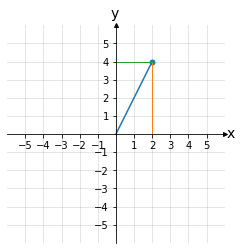

In [31]:
plotVector((2,4))

The point above is one representation of the 2D vector of integers (2,4)  
Note that it has a *magnitude* in the x and y directions 

The line connecting that point to the origin is another way to conceptualize the vector (2,4)  
Note that the line has a *length* and *orientation* fixed by the position of (2,4) in the coordinate grid above  


### Matrices and N-dimensional space arrays
Increasing the dimensionality of a vector moves it into new, larger vector space.  
Adding an element to the set in the vector space maintains dimensionality. 
a matrix expands a vector without changing its dimensionality  
the vector: 

In [32]:
%%latex
\begin{align}
[1,2] = \overrightarrow{\mathbb{v}} \in \mathbb{R^2}
\end{align}

<IPython.core.display.Latex object>

could be combined with the vector: 

In [33]:
%%latex
\begin{align}
[3,2] = \overrightarrow{\mathbb{v}} \in \mathbb{R^2}
\end{align}

<IPython.core.display.Latex object>

to create the 2-D matrix


In [34]:
%%latex
\begin{align}
M = \begin{bmatrix}
1,2\\
3,2
\end{bmatrix} = \overrightarrow{\mathbb{v}} \in \mathbb{R^2}
\end{align}

<IPython.core.display.Latex object>

The matrix now describes 2 points within the vectorspace $$\mathbb{R^2}$$  
this could also describe a line in this vectorspace that contains the two points represented by rows in this matrix

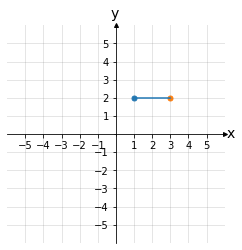

In [35]:
plotLine((1,2), (3,2))

N-dimensional arrays can be constructed by adding axes to a coordinate system or otherwise defining orthogonal features 
smaller dimensional arrays define subsets of N-dimensional space similarly to how  
a vector defines a point in 2D space and a 2D matrix defines a line in 2D space  
a 3 dimensional matrix defines a 3D volume in 3D space


## Vector and matrix operations
Just as vectors and matrices have geometric paralells, operations on them also have their pairs
> in 1 dimension - Scalar addition and multiplication both move a point along the metric axis    
>      there is no vector addition or multiplication possible in just 1 dimension  
> in 2 dimensions - Scalar addition shifts in one or both dimensions, and multiplication lengthens  
>      Vector operations perform more complex manipulations on matrices  


Consider the following simple operations: 

In [36]:
%%latex
\begin{align}
2 * [1,2] = [2,4]
\end{align}

<IPython.core.display.Latex object>

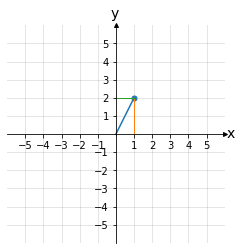

In [37]:
plotVector([1,2])

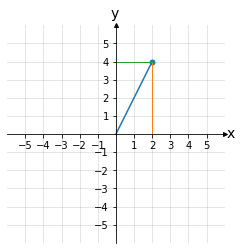

In [38]:
result = np.array([1,2]) * 2
plotVector(result)

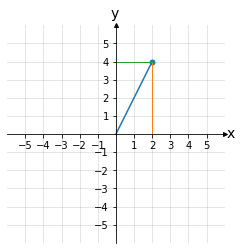

In [39]:
plotVector([2,4])

similarly adding vectors can shift a point along the orthogonal coordinate axes

In [41]:
%%latex
\begin{align}
[3,4] + [1,2] = [4,6]
\end{align}

<IPython.core.display.Latex object>

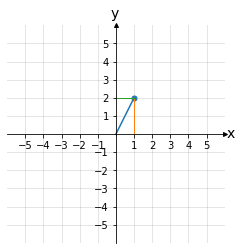

In [42]:
plotVector([1,2])

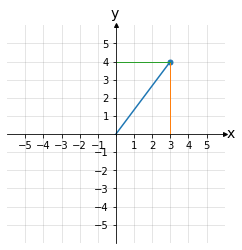

In [43]:
plotVector([3,4])

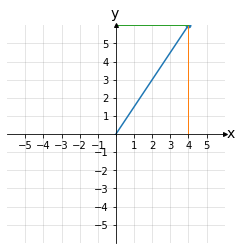

In [44]:
result = np.array([1,2]) + np.array([3,4])
plotVector(result)

More complex operations are possible when working in higher dimensional spaces  
*Matrix Multiplication* or "dot products" are projections of one matrix onto another coordinate system




## Matrix properties 1 - Rank
The matrix itself merits characterization  
if a matrix defines a line in 2D and a plane in 3D, then it can be said to be consistent
a consistent matrix corresponds to a system of linear equations with at least one solution

the *rank* of a matrix can help determine if it defines a coherent geometry and has solutions
The rank of a matrix is the number of 1 values in reduced row echelon form

row reduction scales, adds, and subtracts the rows of the matrix until there are as many ones along the diagonal as possible
row reduction generates a triangular matrix, with zeros in the lower corner

In [47]:
np.linalg.matrix_rank(c)

1

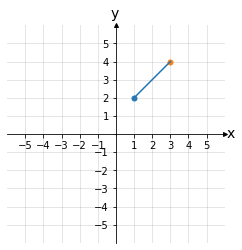

2

In [53]:
h=np.array(([1,2], [3,4]))
plotLine(h[0], h[1])
np.linalg.matrix_rank(h)

above we see that matrix h defines a coherent set of points on the line between (1,2) and (3,4)  
the rank of the matrix, 2, is the same an the number of rows, n=2 and the number of columns, m=2.   
This implies that the system is consistent and has at most one solution

We'll also show below that the reduced row echelen form of the array provides the solution

Using a reduced row echelon form matrix solver from:   https://stackoverflow.com/questions/7664246/python-built-in-function-to-do-matrix-reduction

In [59]:
def rref(A, tol=1.0e-12):
    m, n = A.shape
    i, j = 0, 0
    jb = []

    while i < m and j < n:
        # Find value and index of largest element in the remainder of column j
        k = np.argmax(np.abs(A[i:m, j])) + i
        p = np.abs(A[k, j])
        if p <= tol:
            # The column is negligible, zero it out
            A[i:m, j] = 0.0
            j += 1
        else:
            # Remember the column index
            jb.append(j)
            if i != k:
                # Swap the i-th and k-th rows
                A[[i, k], j:n] = A[[k, i], j:n]
            # Divide the pivot row i by the pivot element A[i, j]
            A[i, j:n] = A[i, j:n] / A[i, j]
            # Subtract multiples of the pivot row from all the other rows
            for k in range(m):
                if k != i:
                    A[k, j:n] -= A[k, j] * A[i, j:n]
            i += 1
            j += 1
    # Finished
    return A, jb

rref(h)


(array([[1, 0, 0, 0],
        [0, 1, 0, 2],
        [0, 0, 1, 0]]),
 [0, 1, 2])

notice that a square matrix in reduced row echelon form is the identity matrix  
an nxn matrix defines a system with a single result if rank()= n  
The identity matrix defines that single result as distances along the coordinate axes of the vector space

In [61]:
z=np.array(([1,2,3,4],[4,2,5,1],[4,1,8,1]))
rref(z)

(array([[1, 0, 0, 0],
        [0, 1, 0, 2],
        [0, 0, 1, 0]]),
 [0, 1, 2])

a rectangular matrix on the other hand have different rrefs  
the z matrix above has more columns than rows, and so rank(z) < m  
this implies the system has infinite solutions or no solutions. 

if we had another row to constrain the system we would again have a square matrix that might have a singular solution